(616, 504)
(39, 32)


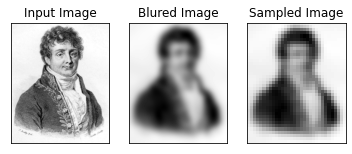

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

img = cv2.imread('Fourier.png',0)
print(img.shape)
img_blur = gaussian_filter(img, sigma=15)
sampled_img = img_blur[::16, ::16]
print(sampled_img.shape)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_blur, cmap = 'gray')
plt.title('Blured Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(sampled_img, cmap = 'gray')
plt.title('Sampled Image'), plt.xticks([]), plt.yticks([])
plt.show()

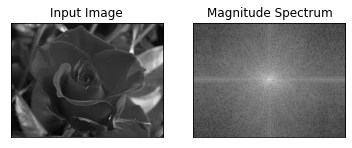

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('flower.jpg',0)
f = np.fft.fft2(img)
# fshift = f
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

img shape (195, 259)
(195, 259)


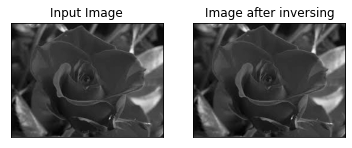

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('flower.jpg',0)
print('img shape', img.shape)
f = np.fft.fft2(img)
print(f.shape)
fshift = np.fft.fftshift(f)     

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after inversing'), plt.xticks([]), plt.yticks([])


plt.show()

In [4]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

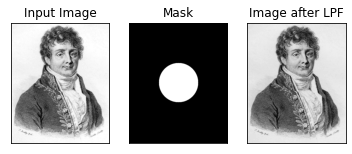

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Fourier.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)


h, w = img.shape
# crow,ccol = int(rows/2) , int(cols/2)
# cut_off = 50
# mask = np.zeros((rows, cols))
# mask[crow-cut_off:crow+cut_off, ccol-cut_off:ccol+cut_off] = 1
radius = 100
center = (int(w/2), int(h/2))
mask = create_circular_mask(h, w, center=center, radius=radius)

fshift = fshift * mask # point-wise multiplication
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(mask, cmap = 'gray')
plt.title('Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])


plt.show()

In [12]:
def create_circular_mask_inv(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center > radius
    return mask

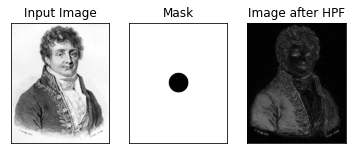

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Fourier.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)


rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
h, w = img.shape
# crow,ccol = int(rows/2) , int(cols/2)
# cut_off = 50
# mask = np.zeros((rows, cols))
# mask[crow-cut_off:crow+cut_off, ccol-cut_off:ccol+cut_off] = 1
radius = 50
center = (int(w/2), int(h/2))
mask = create_circular_mask_inv(h, w, center=center, radius=radius)

# cut_off = 50
# fshift[crow-cut_off:crow+cut_off, ccol-cut_off:ccol+cut_off] = 0

# f_ishift = np.fft.ifftshift(fshift)
# img_back = np.fft.ifft2(f_ishift)
# img_back = np.abs(img_back)



fshift = fshift * mask # point-wise multiplication
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(mask, cmap = 'gray')
plt.title('Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])


plt.show()